In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as mplt
import nltk

In [2]:
df = pd.read_csv('C:\\Users\\bethdan\\Desktop\\Project Datasets\\IMDB-Movie-Data.csv', encoding = 'windows-1254')

# Accessing the Data

In [3]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [4]:
df.head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0


In [5]:
df.tail(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
990,991,Underworld: Rise of the Lycans,"Action,Adventure,Fantasy",An origins story centered on the centuries-old...,Patrick Tatopoulos,"Rhona Mitra, Michael Sheen, Bill Nighy, Steven...",2009,92,6.6,129708,45.80,44.0
991,992,Taare Zameen Par,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.20,42.0
992,993,Take Me Home Tonight,"Comedy,Drama,Romance","Four years after graduation, an awkward high s...",Michael Dowse,"Topher Grace, Anna Faris, Dan Fogler, Teresa P...",2011,97,6.3,45419,6.92,NaN
993,994,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0
994,995,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
999,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [7]:
df.size

12000

In [8]:
df.shape

(1000, 12)

In [9]:
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


# Checking Data Values

In [10]:
df.duplicated().sum()

0

<Axes: >

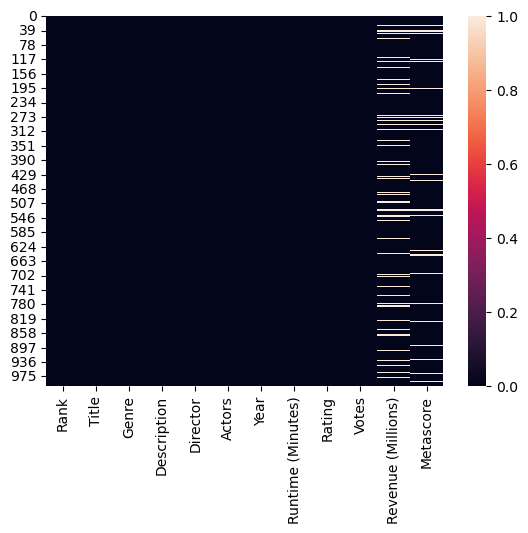

In [11]:
sb.heatmap(df.isnull())

In [12]:
df.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [13]:
per_missing =df.isnull() .sum() * 100 / len(df)
per_missing

Rank                   0.0
Title                  0.0
Genre                  0.0
Description            0.0
Director               0.0
Actors                 0.0
Year                   0.0
Runtime (Minutes)      0.0
Rating                 0.0
Votes                  0.0
Revenue (Millions)    12.8
Metascore              6.4
dtype: float64

In [14]:
df['Revenue (Millions)']

0      333.13
1      126.46
2      138.12
3      270.32
4      325.02
        ...  
995       NaN
996     17.54
997     58.01
998       NaN
999     19.64
Name: Revenue (Millions), Length: 1000, dtype: float64

In [15]:
df['Metascore']

0      76.0
1      65.0
2      62.0
3      59.0
4      40.0
       ... 
995    45.0
996    46.0
997    50.0
998    22.0
999    11.0
Name: Metascore, Length: 1000, dtype: float64

# Exploration and Visualization

In [16]:
#The year with the Highest Average Voting

df.groupby('Year')['Votes'].mean().sort_values(ascending=False)


Year
2012    285226.093750
2008    275505.384615
2006    269289.954545
2009    255780.647059
2010    252782.316667
2007    244331.037736
2011    240790.301587
2013    219049.648352
2014    203930.224490
2015    115726.220472
2016     48591.754209
Name: Votes, dtype: float64

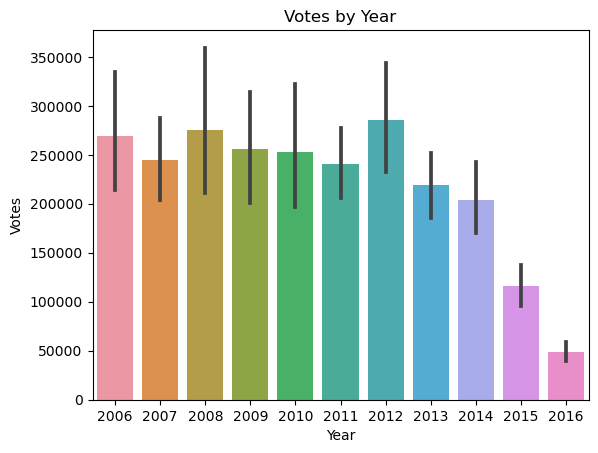

In [17]:
sb.barplot(x='Year',y='Votes',data=df)
mplt.title("Votes by Year")
mplt.show()


In [18]:
#The year with the Highest Average Revenue

df.groupby('Year')['Revenue (Millions)'].mean().sort_values(ascending=False)

Year
2009    112.601277
2012    107.973281
2010    105.081579
2008     99.082745
2007     87.882245
2011     87.612258
2013     87.121818
2006     86.296667
2014     85.078723
2015     78.355044
2016     54.690976
Name: Revenue (Millions), dtype: float64

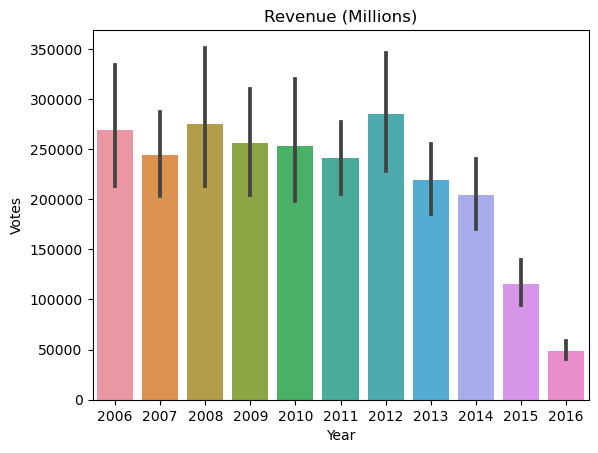

In [19]:
sb.barplot(x='Year',y='Votes',data=df)
mplt.title("Revenue (Millions)")
mplt.show()

In [20]:
#The average rating for each director

df.groupby('Director')['Rating'].mean().sort_values(ascending=False)

Director
Nitesh Tiwari        8.80
Christopher Nolan    8.68
Olivier Nakache      8.60
Makoto Shinkai       8.60
Aamir Khan           8.50
                     ... 
Micheal Bafaro       3.50
Jonathan Holbrook    3.20
Shawn Burkett        2.70
James Wong           2.70
Jason Friedberg      1.90
Name: Rating, Length: 644, dtype: float64

In [21]:
#Movies having a runtime greater than 180

df['Runtime (Minutes)']>=180

#Displayed with thier titles and  genre

df[df['Runtime (Minutes)']>=180] ['Title']


82     The Wolf of Wall Street
88           The Hateful Eight
311            La vie d'AdÃ¨le
828                 Grindhouse
965              Inland Empire
Name: Title, dtype: object

In [22]:
#The Top 10 lengthy Movie Title and Runtime


Top10_len=df.nlargest(10,'Runtime (Minutes)') [['Title','Runtime (Minutes)']]\
.set_index('Title')

In [23]:
Top10_len

,Runtime (Minutes)
Title,
Grindhouse,191
The Hateful Eight,187
The Wolf of Wall Street,180
La vie d'AdÃ¨le,180
Inland Empire,180
Cloud Atlas,172
3 Idiots,170
Interstellar,169
Pirates of the Caribbean: At World's End,169


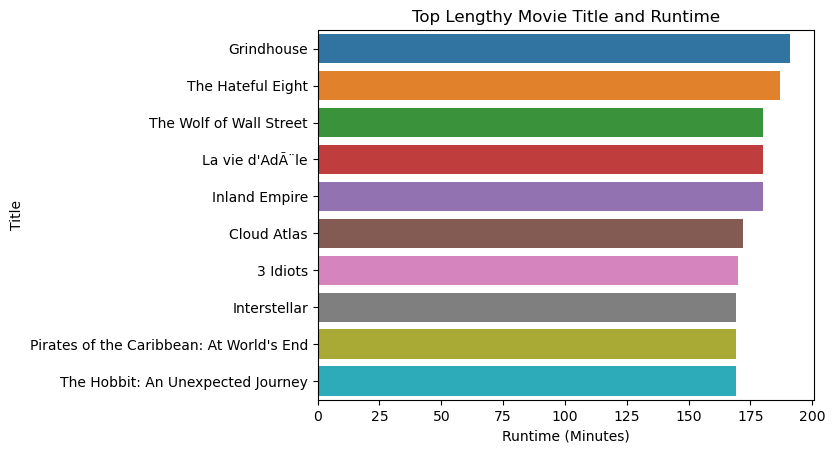

In [24]:
#Visualizing it

sb.barplot(x='Runtime (Minutes)',y=Top10_len.index,data=Top10_len)
mplt.title("Top Lengthy Movie Title and Runtime")
mplt.show()

In [25]:
#The Number of Movies Per Year
df['Year'].value_counts()

2016    297
2015    127
2014     98
2013     91
2012     64
2011     63
2010     60
2007     53
2008     52
2009     51
2006     44
Name: Year, dtype: int64

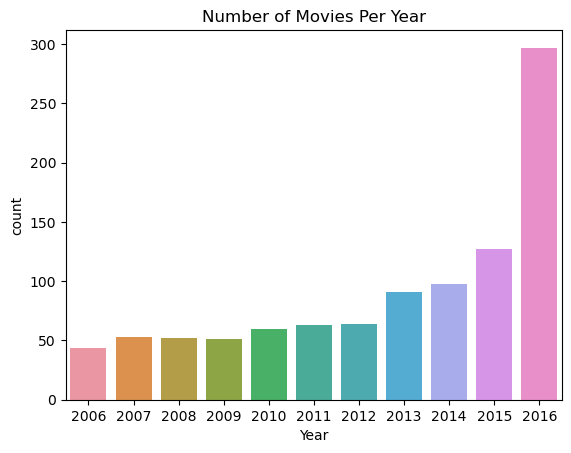

In [26]:
sb.countplot(x='Year', data=df)
mplt.title("Number of Movies Per Year")
mplt.show()

In [27]:
#The Most Popular Movie Title Generating the highest revenue

df['Revenue (Millions)'].max() ---- 936.63

#Comparing the maximum value with other values in the revenue column
df['Revenue (Millions)'].max() ==df['Revenue (Millions)']

df[df['Revenue (Millions)'].max() ==df['Revenue (Millions)']]['Title']

50    Star Wars: Episode VII - The Force Awakens
Name: Title, dtype: object

In [28]:
#Top 10 Highest Rated Movie Titles and its Directors

Top10_len=df.nlargest(10,'Rating') [['Title','Rating','Director','Year']]\
.set_index('Title') 

In [29]:
Top10_len

,Rating,Director,Year
Title,,,
The Dark Knight,9.0,Christopher Nolan,2008
Inception,8.8,Christopher Nolan,2010
Dangal,8.8,Nitesh Tiwari,2016
Interstellar,8.6,Christopher Nolan,2014
Kimi no na wa,8.6,Makoto Shinkai,2016
The Intouchables,8.6,Olivier Nakache,2011
The Prestige,8.5,Christopher Nolan,2006
The Departed,8.5,Martin Scorsese,2006
The Dark Knight Rises,8.5,Christopher Nolan,2012


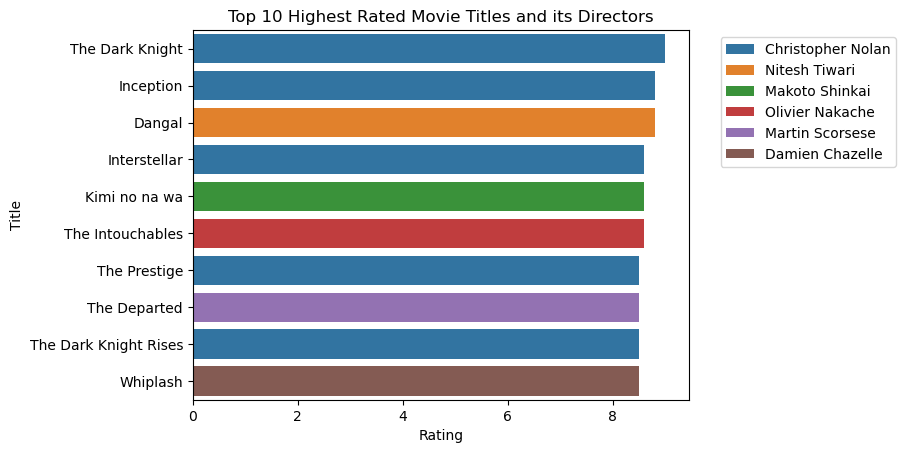

In [30]:
sb.barplot(x='Rating',y=Top10_len.index,data=Top10_len,hue='Director',
             dodge=False) 
mplt.legend(bbox_to_anchor=(1.05,1),loc=2)

mplt.title("Top 10 Highest Rated Movie Titles and its Directors")
mplt.show()

In [31]:
#Top 10 Highest Revenue Movie Titles

Top_10=df.nlargest(10,'Revenue (Millions)') [['Title', 'Revenue (Millions)']].\
set_index('Title')


In [32]:
Top_10

,Revenue (Millions)
Title,
Star Wars: Episode VII - The Force Awakens,936.63
Avatar,760.51
Jurassic World,652.18
The Avengers,623.28
The Dark Knight,533.32
Rogue One,532.17
Finding Dory,486.29
Avengers: Age of Ultron,458.99
The Dark Knight Rises,448.13


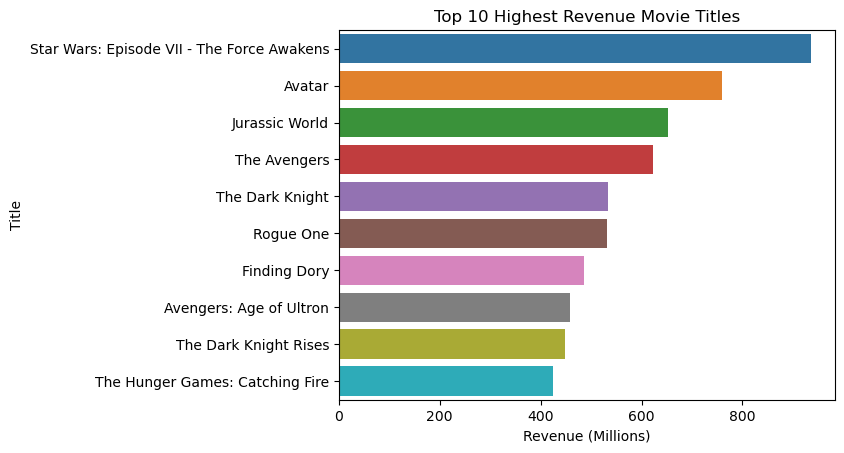

In [33]:
sb.barplot(x='Revenue (Millions)', y=Top_10.index,data=Top_10)
mplt.title("Top 10 Highest Revenue Movie Titles")
mplt.show()

In [34]:
#The Average Movie Rating Yearly

df.groupby('Year')['Rating'].mean().sort_values(ascending=False)

Year
2007    7.133962
2006    7.125000
2009    6.960784
2012    6.925000
2011    6.838095
2014    6.837755
2010    6.826667
2013    6.812088
2008    6.784615
2015    6.602362
2016    6.436700
Name: Rating, dtype: float64

<Axes: xlabel='Rating', ylabel='Revenue (Millions)'>

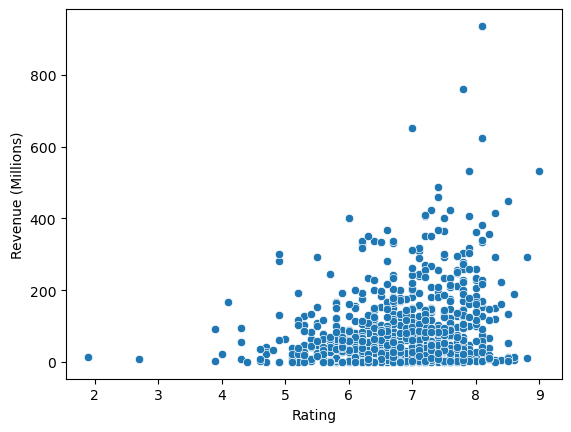

In [35]:
#Checking the Effect of Rating on Revenue

sb.scatterplot(x="Rating",y="Revenue (Millions)",data=df)

# Feature Engineering

In [36]:
#Classifying movies based on Rating as [Excellent, Good ,Bad]

def rating (rating):
    if rating >=7.0:
        return "Excellent"
    elif rating>=6.0:
        return "Good"
    else:
            return "Average"

In [37]:
df['Rating_Category'] = df ['Rating'].apply(rating)

In [38]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Rating_Category
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Excellent
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Excellent
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Excellent
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Excellent
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Good


In [39]:
#Extracting decades from the Year column to create a column called Decade

df['Decade']=df['Year'].apply(lambda x:x // 10*10)

In [40]:
df['Decade']

0      2010
1      2010
2      2010
3      2010
4      2010
       ... 
995    2010
996    2000
997    2000
998    2010
999    2010
Name: Decade, Length: 1000, dtype: int64

In [41]:
#Creating a new column for movie length categories

df['Movie_Length_Category']=pd.cut(df['Runtime (Minutes)'],bins=[0,60,120,np.inf], labels=['Short','Medium','Long'])


In [42]:
df['Movie_Length_Category']

0        Long
1        Long
2      Medium
3      Medium
4        Long
        ...  
995    Medium
996    Medium
997    Medium
998    Medium
999    Medium
Name: Movie_Length_Category, Length: 1000, dtype: category
Categories (3, object): ['Short' < 'Medium' < 'Long']

In [43]:
#Effect of Movie Length on Ratings and Reviews

movie_length_analysis=df.groupby('Movie_Length_Category')[['Rating', 'Revenue (Millions)']].mean()

print(movie_length_analysis)

                         Rating  Revenue (Millions)
Movie_Length_Category                              
Short                       NaN                 NaN
Medium                 6.542194           63.716784
Long                   7.168512          124.723782


In [72]:
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [77]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [80]:
#Creating a keyword column from Description column


df['Keywords'] = df['Description'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stopwords.words('english')]))

In [47]:
df['Keywords']

0      group intergalactic criminals forced work toge...
1      Following clues origin mankind, team finds str...
2      Three girls kidnapped man diagnosed 23 distinc...
3      city humanoid animals, hustling theater impres...
4      secret government agency recruits dangerous in...
                             ...                        
995    tight-knit team rising investigators, along su...
996    Three American college students studying abroa...
997    Romantic sparks occur two dance students diffe...
998    pair friends embark mission reunite pal woman ...
999    stuffy businessman finds trapped inside body f...
Name: Keywords, Length: 1000, dtype: object

In [48]:
df['Description']

0      A group of intergalactic criminals are forced ...
1      Following clues to the origin of mankind, a te...
2      Three girls are kidnapped by a man with a diag...
3      In a city of humanoid animals, a hustling thea...
4      A secret government agency recruits some of th...
                             ...                        
995    A tight-knit team of rising investigators, alo...
996    Three American college students studying abroa...
997    Romantic sparks occur between two dance studen...
998    A pair of friends embark on a mission to reuni...
999    A stuffy businessman finds himself trapped ins...
Name: Description, Length: 1000, dtype: object

In [69]:
!python --version

Python 3.10.9


In [79]:
!pip install wordcloud

In [87]:
from wordcloud import WordCloud

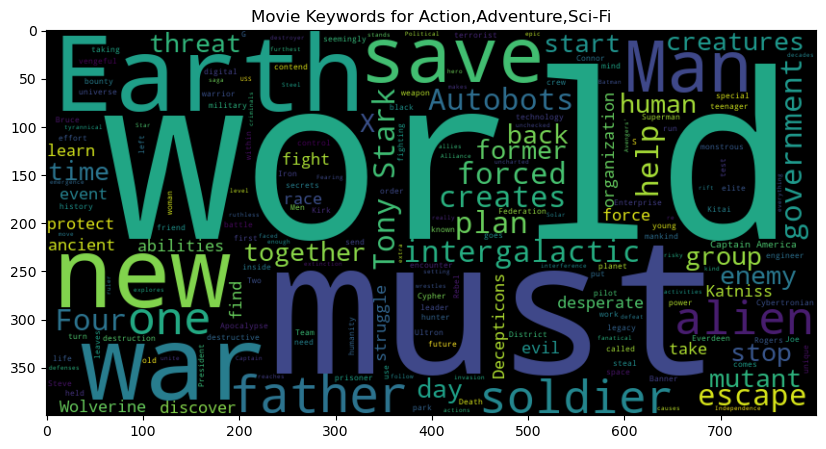

NameError: name 'counter' is not defined

In [90]:
#Distribution of Movie Keywords by Genre

# Get the unique genres
unique_genres = df['Genre'].unique()

#initiate a counter 
couter = 0

# Loop through each unique genre
for genre in unique_genres:
    # Filter the keywords for the current genre
    genre_keywords = df[df['Genre'] == genre]['Keywords']
   
    # Create the word cloud
    wordcloud = WordCloud(width=800, height=400, random_state=42).generate(' '.join(genre_keywords))
   
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Movie Keywords for {genre}')
    plt.show()
    #plt.savefig(f'wordcloud_{genre}.png')
    
    #Increment the counter
    counter += 1
    
    #Stop after 10 iterations
    if counter >= 10:
        break

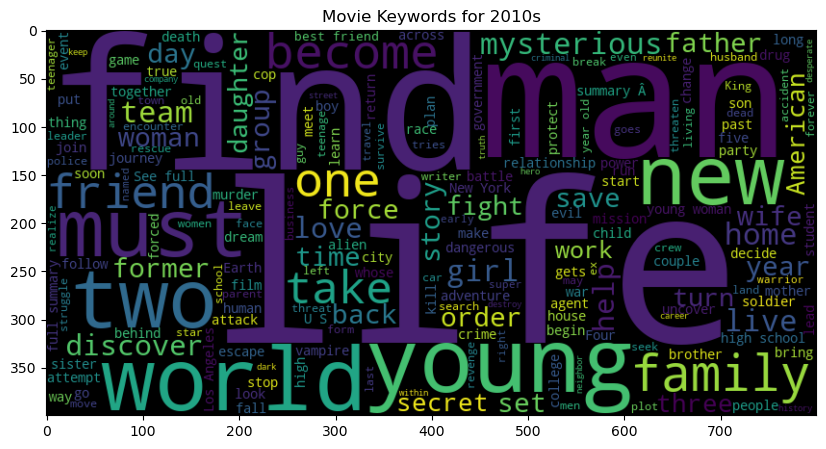

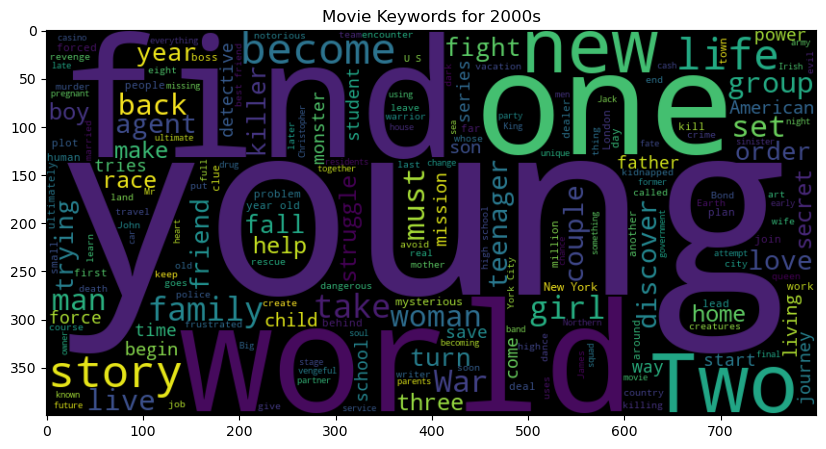

In [91]:
#Distribution of Movie Keywords by Genre Decade

# Get the unique decades
unique_decades = df['Decade'].unique()

# Loop through each unique decade
for decade in unique_decades:
    # Filter the keywords for the current decade
    decade_keywords = df[df['Decade'] == decade]['Keywords']
   
    # Create the word cloud
    wordcloud = WordCloud(width=800, height=400, random_state=42).generate(' '.join(decade_keywords))
   
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Movie Keywords for {decade}s')
    plt.show()

In [51]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore', 'Rating_Category', 'Decade', 'Movie_Length_Category',
       'Keywords'],
      dtype='object')

In [52]:
#What is the Number of Action Movies

len(df[df['Genre'].str.contains('Action',case=False)])

303

In [53]:
#Find Unique Values From Genre Column

df['Genre']

0       Action,Adventure,Sci-Fi
1      Adventure,Mystery,Sci-Fi
2               Horror,Thriller
3       Animation,Comedy,Family
4      Action,Adventure,Fantasy
                 ...           
995         Crime,Drama,Mystery
996                      Horror
997         Drama,Music,Romance
998            Adventure,Comedy
999       Comedy,Family,Fantasy
Name: Genre, Length: 1000, dtype: object

In [54]:
#Adding a comma to separate each genre

list1=[]
for value in df['Genre']:
    list1.append(value.split(','))
    
list1

len(list1)

1000

In [55]:
list_2=[]
for item in list1:
    for item1 in item:
        list_2.append(item1)
        
list_2

['Action',
 'Adventure',
 'Sci-Fi',
 'Adventure',
 'Mystery',
 'Sci-Fi',
 'Horror',
 'Thriller',
 'Animation',
 'Comedy',
 'Family',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Fantasy',
 'Comedy',
 'Drama',
 'Music',
 'Comedy',
 'Action',
 'Adventure',
 'Biography',
 'Adventure',
 'Drama',
 'Romance',
 'Adventure',
 'Family',
 'Fantasy',
 'Biography',
 'Drama',
 'History',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Comedy',
 'Drama',
 'Animation',
 'Adventure',
 'Comedy',
 'Biography',
 'Drama',
 'History',
 'Action',
 'Thriller',
 'Biography',
 'Drama',
 'Drama',
 'Mystery',
 'Sci-Fi',
 'Adventure',
 'Drama',
 'Thriller',
 'Drama',
 'Crime',
 'Drama',
 'Horror',
 'Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Comedy',
 'Action',
 'Adventure',
 'Drama',
 'Horror',
 'Thriller',
 'Comedy',
 'Action',
 'Adventure',
 'Drama',
 'Comedy',
 'Drama',
 'Thriller',
 'Action',
 'Adventure',
 'Sci-Fi',
 

In [56]:
#Creating the unique list
list_3=[]
for item in list_2:
    if item not in list_3:
        list_3.append(item)

#Here are the unique lists
list_3

['Action',
 'Adventure',
 'Sci-Fi',
 'Mystery',
 'Horror',
 'Thriller',
 'Animation',
 'Comedy',
 'Family',
 'Fantasy',
 'Drama',
 'Music',
 'Biography',
 'Romance',
 'History',
 'Crime',
 'Western',
 'War',
 'Musical',
 'Sport']

In [57]:
len(list_3)

20

In [58]:
#Count of films made under each Genre

list_2=[]
for item in list1:
    for item1 in item:
        list_2.append(item1)

In [59]:
from collections import Counter

In [60]:
Counter(list_2)

Counter({'Action': 303,
         'Adventure': 259,
         'Sci-Fi': 120,
         'Mystery': 106,
         'Horror': 119,
         'Thriller': 195,
         'Animation': 49,
         'Comedy': 279,
         'Family': 51,
         'Fantasy': 101,
         'Drama': 513,
         'Music': 16,
         'Biography': 81,
         'Romance': 141,
         'History': 29,
         'Crime': 150,
         'Western': 7,
         'War': 13,
         'Musical': 5,
         'Sport': 18})

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rank                   1000 non-null   int64   
 1   Title                  1000 non-null   object  
 2   Genre                  1000 non-null   object  
 3   Description            1000 non-null   object  
 4   Director               1000 non-null   object  
 5   Actors                 1000 non-null   object  
 6   Year                   1000 non-null   int64   
 7   Runtime (Minutes)      1000 non-null   int64   
 8   Rating                 1000 non-null   float64 
 9   Votes                  1000 non-null   int64   
 10  Revenue (Millions)     872 non-null    float64 
 11  Metascore              936 non-null    float64 
 12  Rating_Category        1000 non-null   object  
 13  Decade                 1000 non-null   int64   
 14  Movie_Length_Category  1000 non-null   ca

In [ ]:
df.head()